# Categorical Deep Q-Network
---
In this notebook, we will implement a Distributional version of DQN, called Categorical DQN. We apply it to the OpenAI Gym's LunarLander-v2 environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

In [2]:
#env = gym.make('LunarLander-v2')
env = gym.make('CartPole-v0')
env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (4,)
Number of actions:  2


In [3]:
from categorical_dqn_agent import Agent

agent = Agent(state_size=4, action_size=2, seed=0, num_atoms=51, V_min=-10, V_max=10)

# watch an untrained agent
state = env.reset()
for j in range(20):
    action = agent.act(state)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 
        
env.close()

### 3. Train the Agent with Categorical DQN

Run the code cell below to train the agent from scratch.  You are welcome to amend the supplied values of the parameters in the function, to try to see if you can get better performance!

Episode 100	Average Score: 11.93
Episode 200	Average Score: 9.680
Episode 300	Average Score: 9.52
Episode 400	Average Score: 10.20
Episode 500	Average Score: 11.05
Episode 600	Average Score: 10.65
Episode 700	Average Score: 11.00
Episode 800	Average Score: 9.989
Episode 900	Average Score: 9.830
Episode 1000	Average Score: 9.76
Episode 1100	Average Score: 9.64
Episode 1200	Average Score: 9.77
Episode 1300	Average Score: 9.80
Episode 1400	Average Score: 9.69
Episode 1500	Average Score: 9.61
Episode 1600	Average Score: 9.47
Episode 1700	Average Score: 9.70
Episode 1800	Average Score: 9.55
Episode 1900	Average Score: 9.870
Episode 2000	Average Score: 9.80
Episode 2100	Average Score: 10.17
Episode 2200	Average Score: 9.770
Episode 2300	Average Score: 9.40
Episode 2400	Average Score: 9.75
Episode 2500	Average Score: 9.82
Episode 2600	Average Score: 9.69
Episode 2700	Average Score: 9.69
Episode 2800	Average Score: 9.64
Episode 2900	Average Score: 9.71
Episode 3000	Average Score: 9.58
Episode 

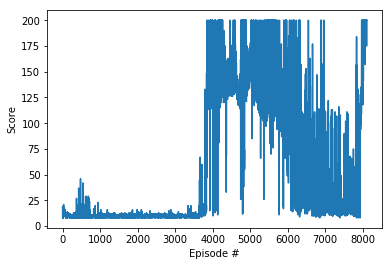

In [4]:
def dqn(n_episodes=20000, max_t=1000, eps_start=1.0, eps_end=0.05, eps_decay=0.995):
    """Categorical Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            #print(action)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = 0.05#max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=195.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [5]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

for i in range(3):
    state = env.reset()
    for j in range(200):
        action = agent.act(state)
        env.render()
        state, reward, done, _ = env.step(action)
        if done:
            break 
            
env.close()